In [1]:
import pandas as pd

import lacroix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
palm = pd.read_csv('PALM_app.csv')
oh = pd.read_csv('PALM_app_canyaonehot.csv')
ca = pd.read_csv('PALM_app_canya.csv')

In [170]:
t = pd.DataFrame(palm['sequence_predictions_4'])
t['Sequence score'] = t['sequence_predictions_4']
t['Residue score (mutated position)'] = palm['mut_pos_score']
t['Dataset'] = 'PALM'
t['label'] = palm['is_amyloid'].astype(int)

t2 = pd.DataFrame(oh['sequence_predictions_4'])
t2['Sequence score'] = t2['sequence_predictions_4']
t2['Residue score (mutated position)'] = oh['mut_pos_score']
t2['Dataset'] = 'PALM (CANYA-trained, one-hot)'
t2['label'] =oh['is_amyloid'].astype(int)

t3 = pd.DataFrame(ca['sequence_predictions_4'])
t3['Sequence score'] = t3['sequence_predictions_4']
t3['Residue score (mutated position)'] = ca['mut_pos_score']
t3['Dataset'] = 'PALM (CANYA-trained)'
t3['label'] =ca['is_amyloid'].astype(int)

data = pd.concat([t,t2,t3])

<Figure size 800x300 with 0 Axes>

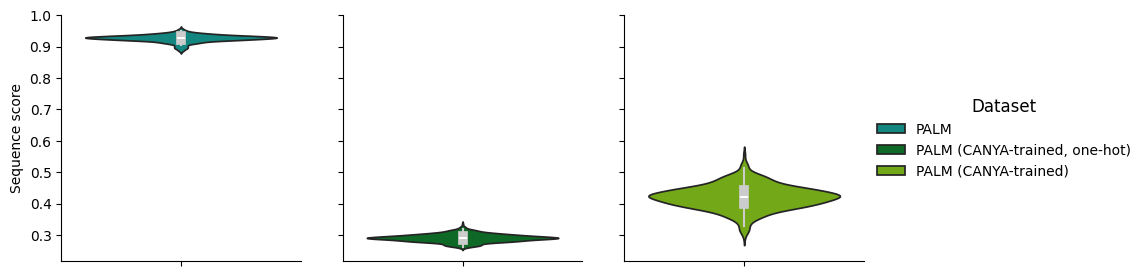

In [192]:
fig = plt.figure(figsize=(8,3))
g = sns.catplot(data=data ,y='Sequence score', kind='violin', col='Dataset', common_norm=False, hue='Dataset',palette=[lacroix.colorList('Berry')[3],lacroix.colorList('Keylime')[3],lacroix.colorList('Keylime')[2]],
           inner_kws=dict(box_width=7, whis_width=1.5, color=".8"),height=3)
g.set_titles("")
g.set_ylabels('Sequence score',fontsize=10)
g.legend.get_title().set_fontsize(12)

g.savefig('app_violin1.png', bbox_inches='tight', dpi=800)
plt.show()

<Figure size 800x200 with 0 Axes>

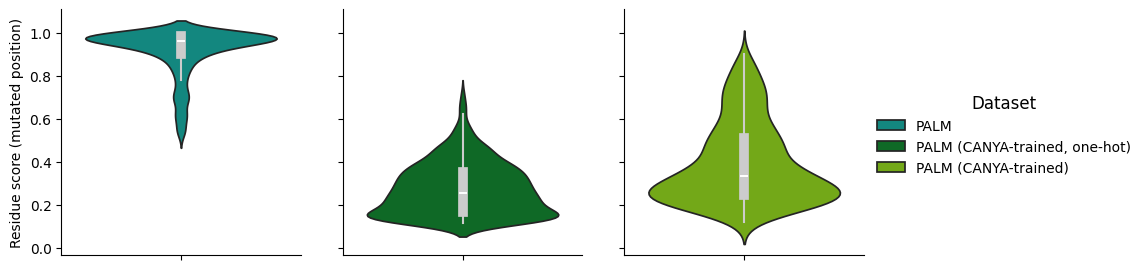

In [193]:
fig = plt.figure(figsize=(8,2))
g = sns.catplot(data=data ,y='Residue score (mutated position)', kind='violin', col='Dataset', common_norm=False, hue='Dataset',palette=[lacroix.colorList('Berry')[3],lacroix.colorList('Keylime')[3],lacroix.colorList('Keylime')[2]],
           inner_kws=dict(box_width=7, whis_width=1.5, color=".8"),height=3)
g.set_titles('')
g.set_ylabels('Residue score (mutated position)',fontsize=10)
g.legend.get_title().set_fontsize(12)
g.savefig('app_violin2.png', bbox_inches='tight', dpi=800)

plt.show()